# Analyse des données des bornes électriques

In [3]:
!pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [16]:
!pip install pyecharts
!pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
import numpy as np
import pyecharts.charts 
from pyecharts import options as opts
from pyecharts.globals import ThemeType 

## Import des données

In [3]:

borne_elec = pd.read_csv("../data/borne_de_recharge.csv")

In [4]:
borne_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50936 entries, 0 to 50935
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nom_operateur           47452 non-null  object 
 1   nom_enseigne            50936 non-null  object 
 2   nom_station             50936 non-null  object 
 3   implantation_station    50936 non-null  object 
 4   adresse_station         50936 non-null  object 
 5   code_insee_commune      36664 non-null  object 
 6   nbre_pdc                50936 non-null  int64  
 7   puissance_nominale      50936 non-null  float64
 8   prise_type_ef           49498 non-null  object 
 9   prise_type_2            49554 non-null  object 
 10  prise_type_combo_ccs    49493 non-null  object 
 11  prise_type_chademo      49493 non-null  object 
 12  prise_type_autre        49493 non-null  object 
 13  gratuit                 49548 non-null  object 
 14  paiement_acte           49571 non-null

In [5]:
borne_elec.head

<bound method NDFrame.head of          nom_operateur            nom_enseigne  \
0               Izivia                ARCACHON   
1               Izivia                ARCACHON   
2               Izivia                ARCACHON   
3               Izivia                ARCACHON   
4               Izivia                ARCACHON   
...                ...                     ...   
50931  HFOOD VILLENAVE            HIPPOPOTAMUS   
50932  HFOOD VILLENAVE            HIPPOPOTAMUS   
50933   SGA Industries  Réseau de recharge L2B   
50934   SGA Industries  Réseau de recharge L2B   
50935     Non concerné     TRISCOS AUTOMOBILES   

                                  nom_station          implantation_station  \
0                        ARCACHON - AIGUILLON                        Voirie   
1                          ARCACHON - PEREIRE                        Voirie   
2                        ARCACHON - AIGUILLON                        Voirie   
3                        ARCACHON - AIGUILLON        

## Choix des colonnes à conserver

In [6]:
colonnes_borne_elec = borne_elec.columns.values.tolist()
print(colonnes_borne_elec)

['nom_operateur', 'nom_enseigne', 'nom_station', 'implantation_station', 'adresse_station', 'code_insee_commune', 'nbre_pdc', 'puissance_nominale', 'prise_type_ef', 'prise_type_2', 'prise_type_combo_ccs', 'prise_type_chademo', 'prise_type_autre', 'gratuit', 'paiement_acte', 'paiement_cb', 'paiement_autre', 'horaires', 'accessibilite_pmr', 'date_mise_en_service', 'date_maj', 'last_modified', 'consolidated_longitude', 'consolidated_latitude', 'prix_kWh', 'prix_session']


In [7]:
borne_elec['strate_prix'] = pd.cut(borne_elec["prix_kWh"], bins=[-1,0.1,0.2,0.3,0.4,0.5,10], labels=["0-0.1","0.1-0.2","0.2-0.3","0.3-0.4", "0.4-0.5","0.5-inf"])

In [9]:
target_column = 'strate_prix'
numerical_columns = [
    "nbre_pdc",
    "puissance_nominale",
    "prix_session",
    "prix_kWh"
]
geographical_columns = [
    'consolidated_longitude',
    'consolidated_latitude',
    'code_insee_commune'
]
categorical_columns = [
    "nom_operateur",
    "nom_enseigne",
    "implantation_station",
    "prise_type_2",
    "prise_type_combo_ccs",
    "prise_type_chademo",
    "prise_type_autre",
    "paiement_acte",
    'gratuit',
    'paiement_cb',
    'paiement_autre',
    'horaires',
    'accessibilite_pmr'
]
all_columns = numerical_columns + categorical_columns + geographical_columns + [target_column]
borne_elec_filtered = borne_elec[all_columns]

In [10]:
print(
    f"The dataset contains {borne_elec_filtered.shape[0]} samples and "
    f"{borne_elec_filtered.shape[1]} columns"
)

The dataset contains 50936 samples and 21 columns


## Premières visualisations des données

ValueError: supplied range of [0.0, inf] is not finite

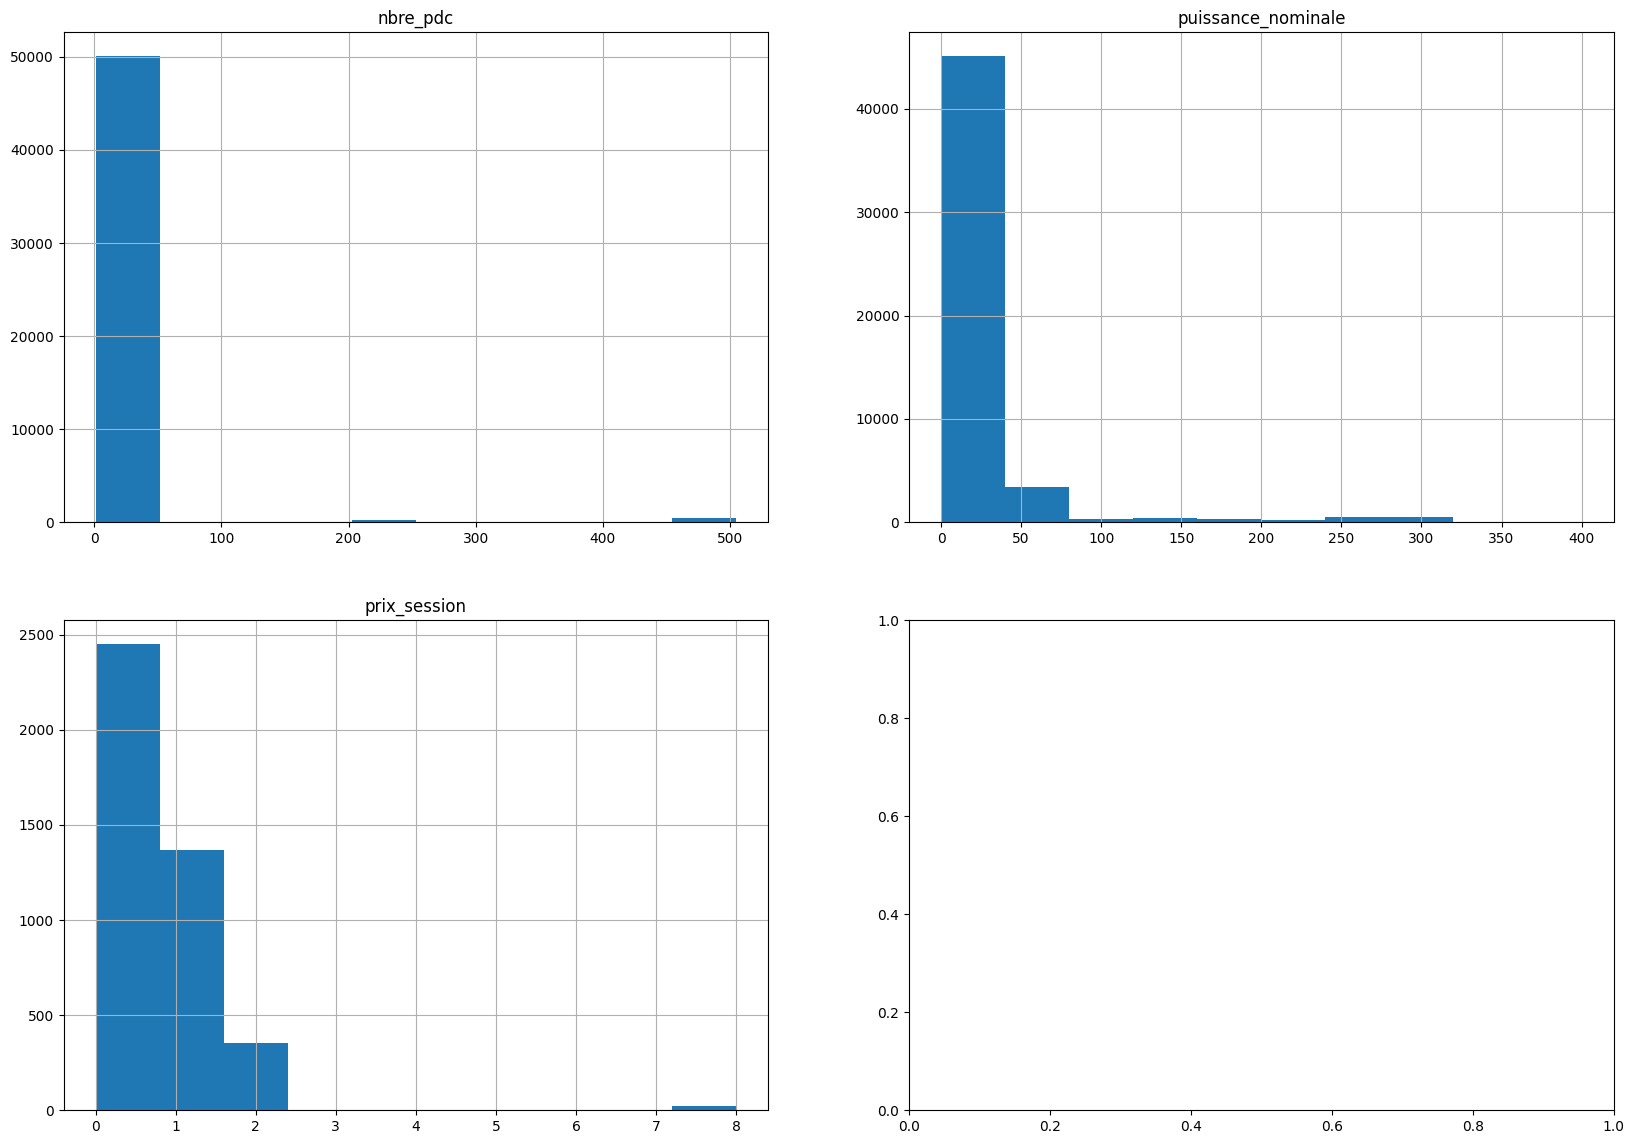

In [11]:
_ = borne_elec_filtered[numerical_columns].hist(figsize=(20, 14))

In [13]:
for col in categorical_columns:
    print(borne_elec_filtered[col].value_counts())
    print("\n")

Bouygues E&S                                               11985
Freshmile SAS                                              11921
Izivia                                                      5605
TotalEnergies Marketing France                              3515
SPIE CITYNETWORKS                                           3265
                                                           ...  
COMMUNAUTE DE COMMUNE LE DOURDANNAIS EN HUREPOIX (CCDH)        1
Hotel Le Moulin                                                1
Sud Hotel                                                      1
Garage lefebvre                                                1
SAS Lujasy                                                     1
Name: nom_operateur, Length: 233, dtype: int64


Freshmile              11417
eborn                   2450
Reveo                   2198
Révéo                   2064
Belib'                  2063
                       ...  
SIEGE247                   1
SIEGE248                   1
SIEG

In [14]:
pd.crosstab(index=borne_elec_filtered["gratuit"],  columns=borne_elec_filtered["implantation_station"])

implantation_station,Parking privé réservé à la clientèle,Parking privé à usage public,Parking public,Station dédiée à la recharge rapide,Voirie
gratuit,,,,,
False,817,5615,1521,1338,32810
True,69,531,94,0,6753


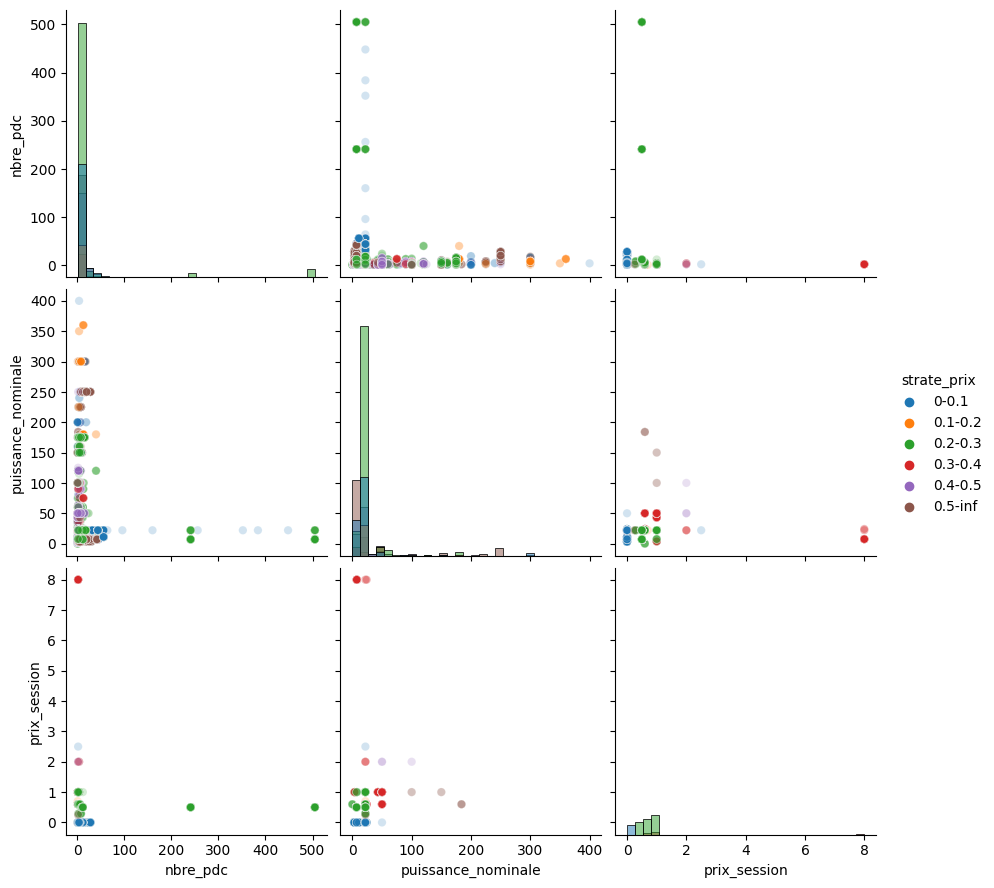

In [15]:
columns = ["nbre_pdc", "puissance_nominale", "prix_session"]

_ = sns.pairplot(
    data=borne_elec_filtered,
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)


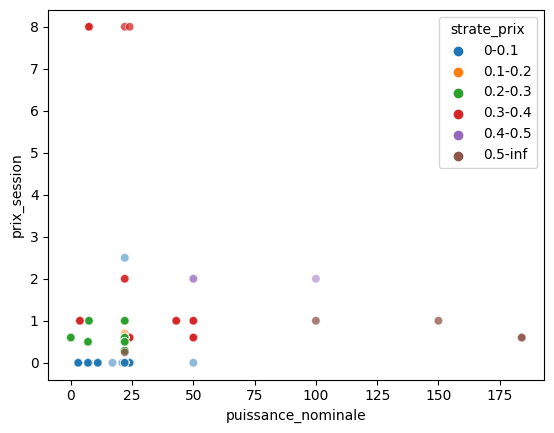

In [16]:
_ = sns.scatterplot(
    x="puissance_nominale",
    y="prix_session",
    data=borne_elec_filtered,
    hue="strate_prix",
    alpha=0.5,
)

In [17]:
borne_elec_ope = borne_elec
borne_elec_ope['ope'] = pd.Series([np.nan]*len(borne_elec_ope))
operateur_1000 = borne_elec_ope['nom_operateur'].value_counts()[borne_elec_ope['nom_operateur'].value_counts() >= 1000].index.tolist()
for index, row in borne_elec_ope.iterrows():
    if row['nom_operateur'] in operateur_1000:
        borne_elec_ope.at[index, 'ope'] = row['nom_operateur']
    else:
        borne_elec_ope.at[index, 'ope'] = "Autre"

In [26]:
borne_elec_ope.head

<bound method NDFrame.head of          nom_operateur            nom_enseigne  \
0               Izivia                ARCACHON   
1               Izivia                ARCACHON   
2               Izivia                ARCACHON   
3               Izivia                ARCACHON   
4               Izivia                ARCACHON   
...                ...                     ...   
50931  HFOOD VILLENAVE            HIPPOPOTAMUS   
50932  HFOOD VILLENAVE            HIPPOPOTAMUS   
50933   SGA Industries  Réseau de recharge L2B   
50934   SGA Industries  Réseau de recharge L2B   
50935     Non concerné     TRISCOS AUTOMOBILES   

                                  nom_station          implantation_station  \
0                        ARCACHON - AIGUILLON                        Voirie   
1                          ARCACHON - PEREIRE                        Voirie   
2                        ARCACHON - AIGUILLON                        Voirie   
3                        ARCACHON - AIGUILLON        

In [25]:
borne_elec_ope[{"ope", "consolidated_longitude", "consolidated_latitude", "prix_kWh"}].to_csv("../data/borne_elec_localisation.csv")

C:\Users\anael.delorme\AppData\Local\Temp\ipykernel_10652\762608085.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  borne_elec_ope[{"ope", "consolidated_longitude", "consolidated_latitude", "prix_kWh"}].to_csv("../data/borne_elec_localisation.csv")


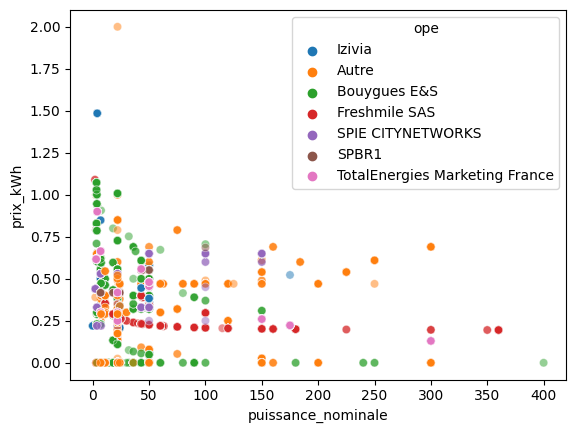

In [35]:
_ = sns.scatterplot(
    x="puissance_nominale",
    y="prix_kWh",
    data=borne_elec_ope[borne_elec_ope["prix_kWh"]<3],
    hue="ope",
    alpha=0.5,
)

# Echarts Plots

In [44]:
nb_bornes_par_operateur = borne_elec_ope.groupby('ope').agg(nb=('nom_enseigne', 'size'), median_price=('prix_kWh', 'median')).reset_index()
print(nb_bornes_par_operateur)

                              ope     nb  median_price
0                           Autre  12195      0.290000
1                    Bouygues E&S  11985      0.000000
2                   Freshmile SAS  11921      0.271818
3                          Izivia   5605      0.270000
4                           SPBR1   2450      0.417000
5               SPIE CITYNETWORKS   3265      0.220000
6  TotalEnergies Marketing France   3515      0.664286


In [75]:
from pyecharts.charts import TreeMap
data_tree_map = [
    {"value": 12195, "name": "Autres opérateurs"},
    {"value": 11985, "name": "Bouygues E&S"},
    {"value": 11921, "name": "Freshmile SAS"},
    {"value": 5605, "name": "Izivia"},
    {"value": 3515, "name": "TotalEnergies Marketing France"},
    {"value": 3265, "name": "SPIE CITYNETWORKS"},
    {"value": 2450, "name": "SPBR1"}               
]

(
    TreeMap(init_opts=opts.InitOpts(width="1200px", height="720px"))
    .add(series_name="", data=data_tree_map, visual_min=300, leaf_depth=1,label_opts=opts.LabelOpts(position="inside"))
    .set_global_opts(title_opts=opts.TitleOpts(title="Nombre de bornes par opérateur", pos_left="leafDepth"), legend_opts=opts.LegendOpts(is_show=False))
    .render("treemap_ope.html")
)

'c:\\Users\\anael.delorme\\Documents\\SSP - AquaPeche\\Python\\dataviz_2023\\hackaviz2023\\analyse\\treemap_ope.html'

In [46]:
c

'c:\\Users\\anael.delorme\\Documents\\SSP - AquaPeche\\Python\\dataviz_2023\\hackaviz2023\\analyse\\treemap_base.html'

'c:\\Users\\anael.delorme\\Documents\\SSP - AquaPeche\\Python\\dataviz_2023\\hackaviz2023\\analyse\\plot_poisson_mer_europe.html'